## Import libraries

In [55]:
!pip3 install seaborn

    100% |████████████████████████████████| 215kB 1.3MB/s ta 0:00:01
    100% |████████████████████████████████| 13.1MB 51kB/s  eta 0:00:01
    100% |████████████████████████████████| 10.5MB 67kB/s  eta 0:00:01
    100% |████████████████████████████████| 20.4MB 35kB/s  eta 0:00:01
    100% |████████████████████████████████| 25.2MB 28kB/s  eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 71kB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 962kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

## Loading datas

In [7]:
data = pd.read_csv('villes.txt', sep=' ')

In [8]:
data

,janvier,février,mars,avril,mai,juin,juillet,aout,septembre,octobre,novembre,décembre,lat,long,moy,amp
Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.5,-0.34,13.3,15.4
Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.2,-4.29,10.8,10.2
Clermont-Ferrand,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.5,3.05,10.9,16.8
Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.1,5.43,11.0,18.6
Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.4,3.04,9.7,14.7
Lyon,2.1,3.3,7.7,10.9,14.9,18.5,20.7,20.1,16.9,11.4,6.7,3.1,45.5,4.51,11.4,18.6
Marseille,5.5,6.6,10.0,13.0,16.8,20.8,23.3,22.8,19.9,15.0,10.2,6.9,43.2,5.24,14.2,17.8
Montpellier,5.6,6.7,9.9,12.8,16.2,20.1,22.7,22.3,19.3,14.6,10.0,6.5,43.4,3.53,13.9,17.1
Nantes,5.0,5.3,8.4,10.8,13.9,17.2,18.8,18.6,16.4,12.2,8.2,5.5,47.1,-1.33,11.7,13.8
Nice,7.5,8.5,10.8,13.3,16.7,20.1,22.7,22.5,20.3,16.0,11.5,8.2,43.4,7.15,14.8,15.2


In [9]:
data.values

array([[ 5.6 ,  6.6 , 10.3 , 12.8 , 15.8 , 19.3 , 20.9 , 21.  , 18.6 ,
        13.8 ,  9.1 ,  6.2 , 44.5 , -0.34, 13.3 , 15.4 ],
       [ 6.1 ,  5.8 ,  7.8 ,  9.2 , 11.6 , 14.4 , 15.6 , 16.  , 14.7 ,
        12.  ,  9.  ,  7.  , 48.2 , -4.29, 10.8 , 10.2 ],
       [ 2.6 ,  3.7 ,  7.5 , 10.3 , 13.8 , 17.3 , 19.4 , 19.1 , 16.2 ,
        11.2 ,  6.6 ,  3.6 , 45.5 ,  3.05, 10.9 , 16.8 ],
       [ 1.5 ,  3.2 ,  7.7 , 10.6 , 14.5 , 17.8 , 20.1 , 19.5 , 16.7 ,
        11.4 ,  6.5 ,  2.3 , 45.1 ,  5.43, 11.  , 18.6 ],
       [ 2.4 ,  2.9 ,  6.  ,  8.9 , 12.4 , 15.3 , 17.1 , 17.1 , 14.7 ,
        10.4 ,  6.1 ,  3.5 , 50.4 ,  3.04,  9.7 , 14.7 ],
       [ 2.1 ,  3.3 ,  7.7 , 10.9 , 14.9 , 18.5 , 20.7 , 20.1 , 16.9 ,
        11.4 ,  6.7 ,  3.1 , 45.5 ,  4.51, 11.4 , 18.6 ],
       [ 5.5 ,  6.6 , 10.  , 13.  , 16.8 , 20.8 , 23.3 , 22.8 , 19.9 ,
        15.  , 10.2 ,  6.9 , 43.2 ,  5.24, 14.2 , 17.8 ],
       [ 5.6 ,  6.7 ,  9.9 , 12.8 , 16.2 , 20.1 , 22.7 , 22.3 , 19.3 ,
        14.6 , 10.  ,  6.5

In [10]:
X= data.values
X_scaled = StandardScaler().fit_transform(X)

In [11]:
pca = PCA(n_components=12).fit(X_scaled[:,:12])

In [12]:
data.var()

janvier       4.029238
février       3.490952
mars          2.338095
avril         2.001714
mai           2.263810
juin          3.216667
juillet       4.532381
aout          4.048095
septembre     3.415524
octobre       3.348857
novembre      3.253524
décembre      3.835524
lat           5.248381
long         11.010024
moy           2.552095
amp           5.412667
dtype: float64

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

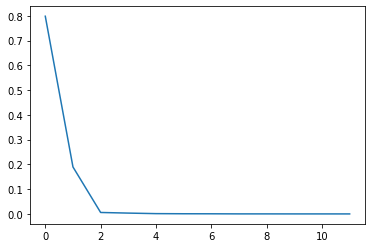

In [14]:
plt.plot(pca.explained_variance_ratio_)

In [15]:
pca.components_

array([[ 0.24592211,  0.28443658,  0.31296643,  0.31314906,  0.28195125,
         0.27898242,  0.27186223,  0.29029943,  0.31466521,  0.31664588,
         0.29196226,  0.25015301],
       [ 0.42705875,  0.31089916,  0.10340033, -0.1349923 , -0.31463106,
        -0.33096004, -0.35221804, -0.28495769, -0.13792688,  0.11297634,
         0.27434474,  0.41377505],
       [ 0.08094119,  0.12682899,  0.58333268,  0.46010266,  0.14571807,
         0.04694066, -0.31035267, -0.23257367, -0.15587454, -0.28035651,
        -0.32156561, -0.21270614],
       [-0.25597048,  0.0584993 ,  0.54832038, -0.27146899, -0.46483692,
        -0.24531769,  0.05914829,  0.20169116,  0.32160358,  0.20120745,
        -0.01505291, -0.30353653],
       [-0.26553798,  0.0450297 , -0.10498955,  0.12623593,  0.40686927,
        -0.2985657 , -0.22017781, -0.32888191,  0.06732119,  0.40474261,
         0.40718323, -0.39373979],
       [ 0.28478331,  0.53580657, -0.36984954,  0.03897652,  0.08561892,
        -0.33324837,  

In [16]:
pca_2 = PCA(n_components=2).fit(X_scaled[:,:12])

In [17]:
X_proj = pca_2.transform(X_scaled[:,:12])

In [18]:
X_proj

array([[ 3.12070711,  0.10929683],
       [-2.26800523,  4.09330725],
       [-1.72593607, -0.59253223],
       [-1.52925815, -1.68794824],
       [-4.21682518,  0.59520143],
       [-0.83493989, -1.78822788],
       [ 4.83272178, -0.82880311],
       [ 4.14730203, -0.4353508 ],
       [-0.28128935,  1.11456345],
       [ 6.00703498,  0.78930843],
       [-1.24193764, -0.15634588],
       [-1.43865282,  1.6711221 ],
       [-4.10559967, -2.17225255],
       [ 1.73616602, -0.13612617],
       [-2.20148793, -0.57521263]])

In [19]:
pca_2.components_

array([[ 0.24592211,  0.28443658,  0.31296643,  0.31314906,  0.28195125,
         0.27898242,  0.27186223,  0.29029943,  0.31466521,  0.31664588,
         0.29196226,  0.25015301],
       [ 0.42705875,  0.31089916,  0.10340033, -0.1349923 , -0.31463106,
        -0.33096004, -0.35221804, -0.28495769, -0.13792688,  0.11297634,
         0.27434474,  0.41377505]])

In [20]:
X_scaled[:,:12][0].dot(pca_2.components_[0])

3.1207071053699096

In [21]:
pca_2.components_[0].dot(pca_2.components_[1])

2.5673907444456745e-16

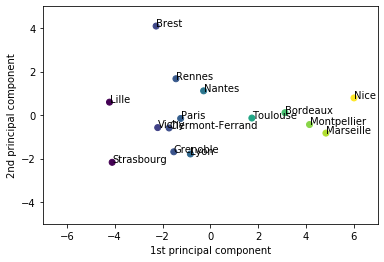

In [22]:
plt.scatter(X_proj[:,0],X_proj[:,1],c=data['moy'])
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.xlim(-7,7)
plt.ylim(-5,5)
for i in range (X_proj.shape[0]):
    plt.text(X_proj[i,0],X_proj[i,1],data.index[i])

(-0.7, 0.7)

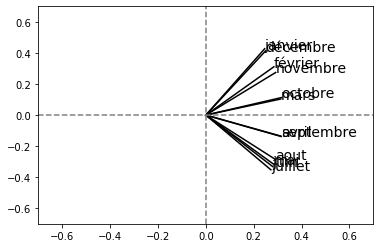

In [23]:
pcs = pca_2.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

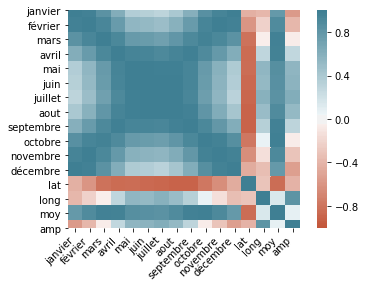

In [24]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [25]:
pca_3 = PCA(n_components=2).fit(X_scaled[:,:])

In [26]:
X_proj_3 = pca_3.transform(X_scaled[:,:])

(-0.7, 0.7)

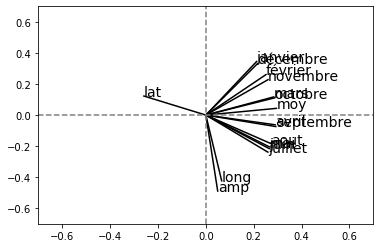

In [27]:
pcs = pca_3.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [29]:
for i in zip(pcs[0, :], pcs[1, :]):
    print(i)

(0.212433985587839, 0.34516245532171186)
(0.25147265363823273, 0.26077796983520546)
(0.2839724511306323, 0.11707107874453015)
(0.2897198047975979, -0.06244116060060237)
(0.26622668973696717, -0.2050516377795232)
(0.2645187523934991, -0.21568122444361276)
(0.25935277713306265, -0.23861122531583756)
(0.2743545510599044, -0.1851195655409772)
(0.2925696160647706, -0.07389751230626708)
(0.28710186697100903, 0.11068544877261521)
(0.25985260917940917, 0.22787881589126485)
(0.2168368368635636, 0.3324617861608844)
(-0.25903495199599, 0.12260088656175495)
(0.0661427818162161, -0.42304443300806666)
(0.2952550126558108, 0.043343655997224936)
(0.049585618228268576, -0.48932209398166554)
